# Exploration of Motiontag Waypoint Dataset

## Class Definition

In [1]:
class Waypoint:
    def __init__(self, id, latitude, longitude, accuracy, time, outlier):
        self.id = id
        self.latitude = latitude
        self.longitude = longitude
        self.accuracy = accuracy
        self.time = time
        self.outlier = outlier        

## Task 1:
### Write a waypoint class and read the provided waypoints.csv file into list of waypoint objects.

In [2]:
import csv

import logging

logger = logging.getLogger()
logger.setLevel(logging.INFO)
logging.info("Task 1.")

list_waypoints = []
with open('waypoints.csv', mode='r') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    for row in csv_reader:
        if line_count == 0:
            line_count += 1
        else:
            list_waypoints.append(Waypoint(row[0], 
                                           row[1], 
                                           row[2], 
                                           row[3], 
                                           row[4], 
                                           row[5]))
            line_count += 1
    logging.info(f'Processed {line_count} lines.')

INFO:root:Task 1.
INFO:root:Processed 193 lines.


## Task 2:

### Plot the unfiltered waypoints

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import descartes
import geopandas as gpd

import sklearn
from sklearn.cluster import DBSCAN

from collections import Counter

from shapely.geometry import Point, Polygon

%matplotlib inline

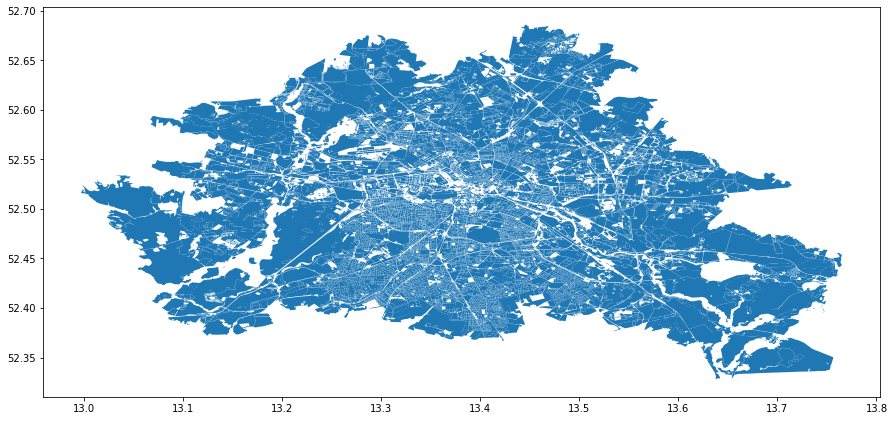

In [4]:
df_shp = gpd.read_file("gis_osm_landuse_a_free_1.shp")

fig, ax = plt.subplots(figsize = (15, 15))
df_shp.plot(ax = ax) 

In [5]:
df = pd.read_csv('waypoints.csv', delimiter=',')
crs ={'init': 'epsg:4326'}

geometry = [Point(xy) for xy in zip(df['longitude'], df['latitude'])]

In [6]:
geo_df = gpd.GeoDataFrame(df, crs = crs, geometry = geometry)

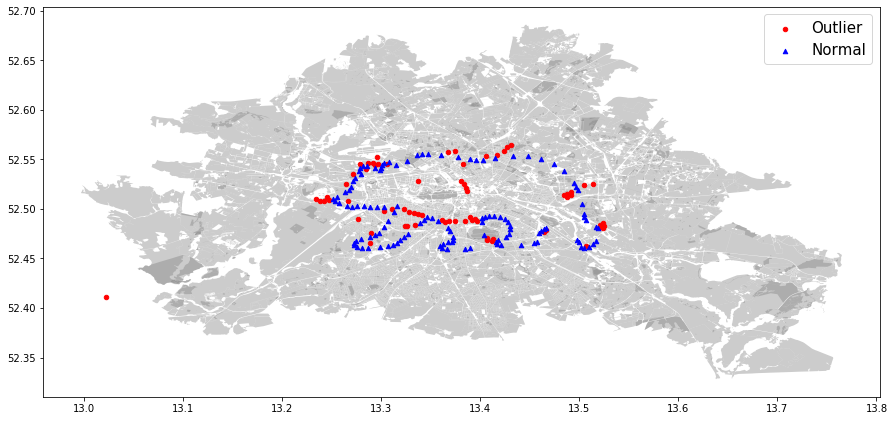

In [7]:
fig, ax = plt.subplots(figsize = (15, 15))
df_shp.plot(ax = ax, alpha = 0.4, color = 'grey')
geo_df[geo_df['outlier'] == True].plot(ax = ax, markersize = 20, color = 'red', marker = 'o', label = 'Outlier')
geo_df[geo_df['outlier'] == False].plot(ax = ax, markersize = 20, color = 'blue', marker = '^', label = 'Normal')
plt.legend(prop = {'size': 15})

## Task 3:
### Explore how to design the filter, beginning with a decision tree to gain intuition on the design

In [8]:
df_features = df.iloc[:, 1:5]
df_label = df.iloc[:, 5]

### Find the optimal hyperparameters for the decision tree

In [9]:
from sklearn.tree import DecisionTreeClassifier

from hyperopt import fmin, tpe, hp, STATUS_OK, Trials
from sklearn.model_selection import cross_val_score

X = df_features
y = df_label

def hyperopt_train_test(params):
    X_ = X[:]
    clf = DecisionTreeClassifier(**params)
    return cross_val_score(clf, X, y).mean()

space4dt = {
    'max_depth': hp.choice('max_depth', range(1,20)),
    'max_features': hp.choice('max_features', range(1,5)),
    'criterion': hp.choice('criterion', ["gini", "entropy"]),
}

def f(params):
    acc = hyperopt_train_test(params)
    return {'loss': -acc, 'status': STATUS_OK}

trials = Trials()
best = fmin(f, space4dt, algo=tpe.suggest, max_evals=300, trials=trials)
logging.info('best:')
logging.info(best)

  0%|          | 0/300 [00:00<?, ?it/s, best loss: ?]

INFO:hyperopt.tpe:tpe_transform took 0.002533 seconds
INFO:hyperopt.tpe:TPE using 0 trials
INFO:hyperopt.tpe:tpe_transform took 0.002860 seconds
INFO:hyperopt.tpe:TPE using 1/1 trials with best loss -0.833063
INFO:hyperopt.tpe:tpe_transform took 0.003423 seconds
INFO:hyperopt.tpe:TPE using 2/2 trials with best loss -0.833063


  1%|          | 3/300 [00:00<00:14, 21.07it/s, best loss: -0.8330634278002698]

INFO:hyperopt.tpe:tpe_transform took 0.002601 seconds
INFO:hyperopt.tpe:TPE using 3/3 trials with best loss -0.833063
INFO:hyperopt.tpe:tpe_transform took 0.007031 seconds
INFO:hyperopt.tpe:TPE using 4/4 trials with best loss -0.833063


  2%|▏         | 5/300 [00:00<00:14, 20.44it/s, best loss: -0.8330634278002698]

INFO:hyperopt.tpe:tpe_transform took 0.002686 seconds
INFO:hyperopt.tpe:TPE using 5/5 trials with best loss -0.833063
INFO:hyperopt.tpe:tpe_transform took 0.002033 seconds
INFO:hyperopt.tpe:TPE using 6/6 trials with best loss -0.833063
INFO:hyperopt.tpe:tpe_transform took 0.002790 seconds
INFO:hyperopt.tpe:TPE using 7/7 trials with best loss -0.833063


  3%|▎         | 8/300 [00:00<00:13, 21.83it/s, best loss: -0.8330634278002698]

INFO:hyperopt.tpe:tpe_transform took 0.002141 seconds
INFO:hyperopt.tpe:TPE using 8/8 trials with best loss -0.833063
INFO:hyperopt.tpe:tpe_transform took 0.002148 seconds
INFO:hyperopt.tpe:TPE using 9/9 trials with best loss -0.833063
INFO:hyperopt.tpe:tpe_transform took 0.002315 seconds
INFO:hyperopt.tpe:TPE using 10/10 trials with best loss -0.833063


  4%|▎         | 11/300 [00:00<00:12, 23.42it/s, best loss: -0.8330634278002698]

INFO:hyperopt.tpe:tpe_transform took 0.002508 seconds
INFO:hyperopt.tpe:TPE using 11/11 trials with best loss -0.833063
INFO:hyperopt.tpe:tpe_transform took 0.001971 seconds
INFO:hyperopt.tpe:TPE using 12/12 trials with best loss -0.833063
INFO:hyperopt.tpe:tpe_transform took 0.002228 seconds
INFO:hyperopt.tpe:TPE using 13/13 trials with best loss -0.833063
INFO:hyperopt.tpe:tpe_transform took 0.003473 seconds
INFO:hyperopt.tpe:TPE using 14/14 trials with best loss -0.833063


  5%|▌         | 15/300 [00:00<00:11, 25.88it/s, best loss: -0.8330634278002698]

INFO:hyperopt.tpe:tpe_transform took 0.001988 seconds
INFO:hyperopt.tpe:TPE using 15/15 trials with best loss -0.833063
INFO:hyperopt.tpe:tpe_transform took 0.001873 seconds
INFO:hyperopt.tpe:TPE using 16/16 trials with best loss -0.833063
INFO:hyperopt.tpe:tpe_transform took 0.001799 seconds
INFO:hyperopt.tpe:TPE using 17/17 trials with best loss -0.833063
INFO:hyperopt.tpe:tpe_transform took 0.001808 seconds
INFO:hyperopt.tpe:TPE using 18/18 trials with best loss -0.833063


  6%|▋         | 19/300 [00:00<00:10, 27.54it/s, best loss: -0.8330634278002698]

INFO:hyperopt.tpe:tpe_transform took 0.001847 seconds
INFO:hyperopt.tpe:TPE using 19/19 trials with best loss -0.833063
INFO:hyperopt.tpe:tpe_transform took 0.002311 seconds
INFO:hyperopt.tpe:TPE using 20/20 trials with best loss -0.833063
INFO:hyperopt.tpe:tpe_transform took 0.002228 seconds
INFO:hyperopt.tpe:TPE using 21/21 trials with best loss -0.833063
INFO:hyperopt.tpe:tpe_transform took 0.002038 seconds
INFO:hyperopt.tpe:TPE using 22/22 trials with best loss -0.833063


  8%|▊         | 23/300 [00:00<00:09, 28.81it/s, best loss: -0.8330634278002698]

INFO:hyperopt.tpe:tpe_transform took 0.002630 seconds
INFO:hyperopt.tpe:TPE using 23/23 trials with best loss -0.833063
INFO:hyperopt.tpe:tpe_transform took 0.001867 seconds
INFO:hyperopt.tpe:TPE using 24/24 trials with best loss -0.833063
INFO:hyperopt.tpe:tpe_transform took 0.002182 seconds
INFO:hyperopt.tpe:TPE using 25/25 trials with best loss -0.833063


  9%|▊         | 26/300 [00:00<00:10, 25.01it/s, best loss: -0.8330634278002698]

INFO:hyperopt.tpe:tpe_transform took 0.002587 seconds
INFO:hyperopt.tpe:TPE using 26/26 trials with best loss -0.833063
INFO:hyperopt.tpe:tpe_transform took 0.002389 seconds
INFO:hyperopt.tpe:TPE using 27/27 trials with best loss -0.833063
INFO:hyperopt.tpe:tpe_transform took 0.003952 seconds
INFO:hyperopt.tpe:TPE using 28/28 trials with best loss -0.833063


 10%|▉         | 29/300 [00:01<00:11, 22.90it/s, best loss: -0.8330634278002698]

INFO:hyperopt.tpe:tpe_transform took 0.002409 seconds
INFO:hyperopt.tpe:TPE using 29/29 trials with best loss -0.833063
INFO:hyperopt.tpe:tpe_transform took 0.003246 seconds
INFO:hyperopt.tpe:TPE using 30/30 trials with best loss -0.833063
INFO:hyperopt.tpe:tpe_transform took 0.001884 seconds
INFO:hyperopt.tpe:TPE using 31/31 trials with best loss -0.833063


 11%|█         | 32/300 [00:01<00:11, 22.69it/s, best loss: -0.8330634278002698]

INFO:hyperopt.tpe:tpe_transform took 0.001867 seconds
INFO:hyperopt.tpe:TPE using 32/32 trials with best loss -0.833063
INFO:hyperopt.tpe:tpe_transform took 0.002299 seconds
INFO:hyperopt.tpe:TPE using 33/33 trials with best loss -0.833063
INFO:hyperopt.tpe:tpe_transform took 0.002128 seconds
INFO:hyperopt.tpe:TPE using 34/34 trials with best loss -0.833063


 12%|█▏        | 35/300 [00:01<00:10, 24.47it/s, best loss: -0.8330634278002698]

INFO:hyperopt.tpe:tpe_transform took 0.001870 seconds
INFO:hyperopt.tpe:TPE using 35/35 trials with best loss -0.833063
INFO:hyperopt.tpe:tpe_transform took 0.001809 seconds
INFO:hyperopt.tpe:TPE using 36/36 trials with best loss -0.833063
INFO:hyperopt.tpe:tpe_transform took 0.001881 seconds
INFO:hyperopt.tpe:TPE using 37/37 trials with best loss -0.833063
INFO:hyperopt.tpe:tpe_transform took 0.001769 seconds
INFO:hyperopt.tpe:TPE using 38/38 trials with best loss -0.833063


 13%|█▎        | 39/300 [00:01<00:09, 26.81it/s, best loss: -0.8330634278002698]

INFO:hyperopt.tpe:tpe_transform took 0.001895 seconds
INFO:hyperopt.tpe:TPE using 39/39 trials with best loss -0.833063
INFO:hyperopt.tpe:tpe_transform took 0.002981 seconds
INFO:hyperopt.tpe:TPE using 40/40 trials with best loss -0.833063
INFO:hyperopt.tpe:tpe_transform took 0.001812 seconds
INFO:hyperopt.tpe:TPE using 41/41 trials with best loss -0.833063
INFO:hyperopt.tpe:tpe_transform took 0.001821 seconds
INFO:hyperopt.tpe:TPE using 42/42 trials with best loss -0.833063


 14%|█▍        | 43/300 [00:01<00:09, 28.39it/s, best loss: -0.8330634278002698]

INFO:hyperopt.tpe:tpe_transform took 0.002187 seconds
INFO:hyperopt.tpe:TPE using 43/43 trials with best loss -0.833063
INFO:hyperopt.tpe:tpe_transform took 0.001829 seconds
INFO:hyperopt.tpe:TPE using 44/44 trials with best loss -0.833063
INFO:hyperopt.tpe:tpe_transform took 0.001801 seconds
INFO:hyperopt.tpe:TPE using 45/45 trials with best loss -0.833063
INFO:hyperopt.tpe:tpe_transform took 0.001772 seconds
INFO:hyperopt.tpe:TPE using 46/46 trials with best loss -0.833063


 16%|█▌        | 47/300 [00:01<00:08, 29.53it/s, best loss: -0.8330634278002698]

INFO:hyperopt.tpe:tpe_transform took 0.001851 seconds
INFO:hyperopt.tpe:TPE using 47/47 trials with best loss -0.833063
INFO:hyperopt.tpe:tpe_transform took 0.002170 seconds
INFO:hyperopt.tpe:TPE using 48/48 trials with best loss -0.833063
INFO:hyperopt.tpe:tpe_transform took 0.001804 seconds
INFO:hyperopt.tpe:TPE using 49/49 trials with best loss -0.833063
INFO:hyperopt.tpe:tpe_transform took 0.001818 seconds
INFO:hyperopt.tpe:TPE using 50/50 trials with best loss -0.833063


 17%|█▋        | 51/300 [00:01<00:08, 30.62it/s, best loss: -0.8330634278002698]

INFO:hyperopt.tpe:tpe_transform took 0.001838 seconds
INFO:hyperopt.tpe:TPE using 51/51 trials with best loss -0.833063
INFO:hyperopt.tpe:tpe_transform took 0.001819 seconds
INFO:hyperopt.tpe:TPE using 52/52 trials with best loss -0.833063
INFO:hyperopt.tpe:tpe_transform took 0.001803 seconds
INFO:hyperopt.tpe:TPE using 53/53 trials with best loss -0.833063
INFO:hyperopt.tpe:tpe_transform took 0.002197 seconds
INFO:hyperopt.tpe:TPE using 54/54 trials with best loss -0.833063


 18%|█▊        | 55/300 [00:01<00:07, 30.72it/s, best loss: -0.8330634278002698]

INFO:hyperopt.tpe:tpe_transform took 0.001847 seconds
INFO:hyperopt.tpe:TPE using 55/55 trials with best loss -0.833063
INFO:hyperopt.tpe:tpe_transform took 0.002219 seconds
INFO:hyperopt.tpe:TPE using 56/56 trials with best loss -0.833063
INFO:hyperopt.tpe:tpe_transform took 0.002124 seconds
INFO:hyperopt.tpe:TPE using 57/57 trials with best loss -0.833063
INFO:hyperopt.tpe:tpe_transform took 0.001821 seconds
INFO:hyperopt.tpe:TPE using 58/58 trials with best loss -0.833063


 20%|█▉        | 59/300 [00:02<00:07, 30.29it/s, best loss: -0.8330634278002698]

INFO:hyperopt.tpe:tpe_transform took 0.002355 seconds
INFO:hyperopt.tpe:TPE using 59/59 trials with best loss -0.833063
INFO:hyperopt.tpe:tpe_transform took 0.004083 seconds
INFO:hyperopt.tpe:TPE using 60/60 trials with best loss -0.833063
INFO:hyperopt.tpe:tpe_transform took 0.003620 seconds
INFO:hyperopt.tpe:TPE using 61/61 trials with best loss -0.833063
INFO:hyperopt.tpe:tpe_transform took 0.001922 seconds
INFO:hyperopt.tpe:TPE using 62/62 trials with best loss -0.833063


 21%|██        | 63/300 [00:02<00:08, 26.80it/s, best loss: -0.8330634278002698]

INFO:hyperopt.tpe:tpe_transform took 0.002067 seconds
INFO:hyperopt.tpe:TPE using 63/63 trials with best loss -0.833063
INFO:hyperopt.tpe:tpe_transform took 0.003111 seconds
INFO:hyperopt.tpe:TPE using 64/64 trials with best loss -0.833063
INFO:hyperopt.tpe:tpe_transform took 0.001864 seconds
INFO:hyperopt.tpe:TPE using 65/65 trials with best loss -0.833063


 22%|██▏       | 66/300 [00:02<00:09, 24.53it/s, best loss: -0.8330634278002698]

INFO:hyperopt.tpe:tpe_transform took 0.002057 seconds
INFO:hyperopt.tpe:TPE using 66/66 trials with best loss -0.833063
INFO:hyperopt.tpe:tpe_transform took 0.004096 seconds
INFO:hyperopt.tpe:TPE using 67/67 trials with best loss -0.833063
INFO:hyperopt.tpe:tpe_transform took 0.001920 seconds
INFO:hyperopt.tpe:TPE using 68/68 trials with best loss -0.833063


 23%|██▎       | 69/300 [00:02<00:09, 25.33it/s, best loss: -0.8330634278002698]

INFO:hyperopt.tpe:tpe_transform took 0.002349 seconds
INFO:hyperopt.tpe:TPE using 69/69 trials with best loss -0.833063
INFO:hyperopt.tpe:tpe_transform took 0.002065 seconds
INFO:hyperopt.tpe:TPE using 70/70 trials with best loss -0.833063
INFO:hyperopt.tpe:tpe_transform took 0.001843 seconds
INFO:hyperopt.tpe:TPE using 71/71 trials with best loss -0.833063


 24%|██▍       | 72/300 [00:02<00:08, 26.27it/s, best loss: -0.8330634278002698]

INFO:hyperopt.tpe:tpe_transform took 0.001865 seconds
INFO:hyperopt.tpe:TPE using 72/72 trials with best loss -0.833063
INFO:hyperopt.tpe:tpe_transform took 0.001832 seconds
INFO:hyperopt.tpe:TPE using 73/73 trials with best loss -0.833063
INFO:hyperopt.tpe:tpe_transform took 0.002370 seconds
INFO:hyperopt.tpe:TPE using 74/74 trials with best loss -0.833063
INFO:hyperopt.tpe:tpe_transform took 0.002169 seconds
INFO:hyperopt.tpe:TPE using 75/75 trials with best loss -0.833063


 25%|██▌       | 76/300 [00:02<00:08, 27.87it/s, best loss: -0.8330634278002698]

INFO:hyperopt.tpe:tpe_transform took 0.001915 seconds
INFO:hyperopt.tpe:TPE using 76/76 trials with best loss -0.833063
INFO:hyperopt.tpe:tpe_transform took 0.001847 seconds
INFO:hyperopt.tpe:TPE using 77/77 trials with best loss -0.833063
INFO:hyperopt.tpe:tpe_transform took 0.002064 seconds
INFO:hyperopt.tpe:TPE using 78/78 trials with best loss -0.833063
INFO:hyperopt.tpe:tpe_transform took 0.001789 seconds
INFO:hyperopt.tpe:TPE using 79/79 trials with best loss -0.833063


 27%|██▋       | 80/300 [00:02<00:07, 28.87it/s, best loss: -0.8330634278002698]

INFO:hyperopt.tpe:tpe_transform took 0.001868 seconds
INFO:hyperopt.tpe:TPE using 80/80 trials with best loss -0.833063
INFO:hyperopt.tpe:tpe_transform took 0.001815 seconds
INFO:hyperopt.tpe:TPE using 81/81 trials with best loss -0.833063
INFO:hyperopt.tpe:tpe_transform took 0.001877 seconds
INFO:hyperopt.tpe:TPE using 82/82 trials with best loss -0.833063
INFO:hyperopt.tpe:tpe_transform took 0.001902 seconds
INFO:hyperopt.tpe:TPE using 83/83 trials with best loss -0.833063


 28%|██▊       | 84/300 [00:03<00:07, 29.84it/s, best loss: -0.8330634278002698]

INFO:hyperopt.tpe:tpe_transform took 0.001962 seconds
INFO:hyperopt.tpe:TPE using 84/84 trials with best loss -0.833063
INFO:hyperopt.tpe:tpe_transform took 0.002148 seconds
INFO:hyperopt.tpe:TPE using 85/85 trials with best loss -0.833063
INFO:hyperopt.tpe:tpe_transform took 0.001930 seconds
INFO:hyperopt.tpe:TPE using 86/86 trials with best loss -0.833063
INFO:hyperopt.tpe:tpe_transform took 0.001789 seconds
INFO:hyperopt.tpe:TPE using 87/87 trials with best loss -0.833063


 29%|██▉       | 88/300 [00:03<00:07, 30.28it/s, best loss: -0.8330634278002698]

INFO:hyperopt.tpe:tpe_transform took 0.001870 seconds
INFO:hyperopt.tpe:TPE using 88/88 trials with best loss -0.833063
INFO:hyperopt.tpe:tpe_transform took 0.001866 seconds
INFO:hyperopt.tpe:TPE using 89/89 trials with best loss -0.833063
INFO:hyperopt.tpe:tpe_transform took 0.001805 seconds
INFO:hyperopt.tpe:TPE using 90/90 trials with best loss -0.833063
INFO:hyperopt.tpe:tpe_transform took 0.001818 seconds
INFO:hyperopt.tpe:TPE using 91/91 trials with best loss -0.833063


 31%|███       | 92/300 [00:03<00:06, 30.13it/s, best loss: -0.8330634278002698]

INFO:hyperopt.tpe:tpe_transform took 0.001826 seconds
INFO:hyperopt.tpe:TPE using 92/92 trials with best loss -0.833063
INFO:hyperopt.tpe:tpe_transform took 0.001810 seconds
INFO:hyperopt.tpe:TPE using 93/93 trials with best loss -0.833063
INFO:hyperopt.tpe:tpe_transform took 0.002737 seconds
INFO:hyperopt.tpe:TPE using 94/94 trials with best loss -0.833063
INFO:hyperopt.tpe:tpe_transform took 0.001896 seconds
INFO:hyperopt.tpe:TPE using 95/95 trials with best loss -0.833063


 32%|███▏      | 96/300 [00:03<00:06, 30.62it/s, best loss: -0.8330634278002698]

INFO:hyperopt.tpe:tpe_transform took 0.001845 seconds
INFO:hyperopt.tpe:TPE using 96/96 trials with best loss -0.833063
INFO:hyperopt.tpe:tpe_transform took 0.001842 seconds
INFO:hyperopt.tpe:TPE using 97/97 trials with best loss -0.833063
INFO:hyperopt.tpe:tpe_transform took 0.002226 seconds
INFO:hyperopt.tpe:TPE using 98/98 trials with best loss -0.833063
INFO:hyperopt.tpe:tpe_transform took 0.001870 seconds
INFO:hyperopt.tpe:TPE using 99/99 trials with best loss -0.833063


 33%|███▎      | 100/300 [00:03<00:06, 31.12it/s, best loss: -0.8330634278002698]

INFO:hyperopt.tpe:tpe_transform took 0.002068 seconds
INFO:hyperopt.tpe:TPE using 100/100 trials with best loss -0.833063
INFO:hyperopt.tpe:tpe_transform took 0.002004 seconds
INFO:hyperopt.tpe:TPE using 101/101 trials with best loss -0.833063
INFO:hyperopt.tpe:tpe_transform took 0.002239 seconds
INFO:hyperopt.tpe:TPE using 102/102 trials with best loss -0.833063
INFO:hyperopt.tpe:tpe_transform took 0.002082 seconds
INFO:hyperopt.tpe:TPE using 103/103 trials with best loss -0.833063


 35%|███▍      | 104/300 [00:03<00:06, 30.32it/s, best loss: -0.8330634278002698]

INFO:hyperopt.tpe:tpe_transform took 0.002684 seconds
INFO:hyperopt.tpe:TPE using 104/104 trials with best loss -0.833063
INFO:hyperopt.tpe:tpe_transform took 0.003468 seconds
INFO:hyperopt.tpe:TPE using 105/105 trials with best loss -0.833063
INFO:hyperopt.tpe:tpe_transform took 0.003047 seconds
INFO:hyperopt.tpe:TPE using 106/106 trials with best loss -0.833063
INFO:hyperopt.tpe:tpe_transform took 0.002005 seconds
INFO:hyperopt.tpe:TPE using 107/107 trials with best loss -0.833063


 36%|███▌      | 108/300 [00:03<00:06, 27.44it/s, best loss: -0.8330634278002698]

INFO:hyperopt.tpe:tpe_transform took 0.001938 seconds
INFO:hyperopt.tpe:TPE using 108/108 trials with best loss -0.833063
INFO:hyperopt.tpe:tpe_transform took 0.002705 seconds
INFO:hyperopt.tpe:TPE using 109/109 trials with best loss -0.833063
INFO:hyperopt.tpe:tpe_transform took 0.002604 seconds
INFO:hyperopt.tpe:TPE using 110/110 trials with best loss -0.833063


 37%|███▋      | 111/300 [00:04<00:07, 24.83it/s, best loss: -0.8330634278002698]

INFO:hyperopt.tpe:tpe_transform took 0.002050 seconds
INFO:hyperopt.tpe:TPE using 111/111 trials with best loss -0.833063
INFO:hyperopt.tpe:tpe_transform took 0.002128 seconds
INFO:hyperopt.tpe:TPE using 112/112 trials with best loss -0.833063
INFO:hyperopt.tpe:tpe_transform took 0.002532 seconds
INFO:hyperopt.tpe:TPE using 113/113 trials with best loss -0.833063


 38%|███▊      | 114/300 [00:04<00:07, 25.71it/s, best loss: -0.8330634278002698]

INFO:hyperopt.tpe:tpe_transform took 0.002069 seconds
INFO:hyperopt.tpe:TPE using 114/114 trials with best loss -0.833063
INFO:hyperopt.tpe:tpe_transform took 0.002322 seconds
INFO:hyperopt.tpe:TPE using 115/115 trials with best loss -0.833063
INFO:hyperopt.tpe:tpe_transform took 0.001850 seconds
INFO:hyperopt.tpe:TPE using 116/116 trials with best loss -0.833063


 39%|███▉      | 117/300 [00:04<00:06, 26.50it/s, best loss: -0.8330634278002698]

INFO:hyperopt.tpe:tpe_transform took 0.001817 seconds
INFO:hyperopt.tpe:TPE using 117/117 trials with best loss -0.833063
INFO:hyperopt.tpe:tpe_transform took 0.001821 seconds
INFO:hyperopt.tpe:TPE using 118/118 trials with best loss -0.833063
INFO:hyperopt.tpe:tpe_transform took 0.002625 seconds
INFO:hyperopt.tpe:TPE using 119/119 trials with best loss -0.833063
INFO:hyperopt.tpe:tpe_transform took 0.002197 seconds
INFO:hyperopt.tpe:TPE using 120/120 trials with best loss -0.833063


 40%|████      | 121/300 [00:04<00:06, 27.55it/s, best loss: -0.8330634278002698]

INFO:hyperopt.tpe:tpe_transform took 0.002551 seconds
INFO:hyperopt.tpe:TPE using 121/121 trials with best loss -0.833063
INFO:hyperopt.tpe:tpe_transform took 0.002133 seconds
INFO:hyperopt.tpe:TPE using 122/122 trials with best loss -0.833063
INFO:hyperopt.tpe:tpe_transform took 0.002068 seconds
INFO:hyperopt.tpe:TPE using 123/123 trials with best loss -0.833063
INFO:hyperopt.tpe:tpe_transform took 0.001794 seconds
INFO:hyperopt.tpe:TPE using 124/124 trials with best loss -0.833063


 42%|████▏     | 125/300 [00:04<00:06, 28.55it/s, best loss: -0.8330634278002698]

INFO:hyperopt.tpe:tpe_transform took 0.001922 seconds
INFO:hyperopt.tpe:TPE using 125/125 trials with best loss -0.833063
INFO:hyperopt.tpe:tpe_transform took 0.001814 seconds
INFO:hyperopt.tpe:TPE using 126/126 trials with best loss -0.833063
INFO:hyperopt.tpe:tpe_transform took 0.001804 seconds
INFO:hyperopt.tpe:TPE using 127/127 trials with best loss -0.833063


 43%|████▎     | 128/300 [00:04<00:05, 28.90it/s, best loss: -0.8330634278002698]

INFO:hyperopt.tpe:tpe_transform took 0.002808 seconds
INFO:hyperopt.tpe:TPE using 128/128 trials with best loss -0.833063
INFO:hyperopt.tpe:tpe_transform took 0.002132 seconds
INFO:hyperopt.tpe:TPE using 129/129 trials with best loss -0.833063
INFO:hyperopt.tpe:tpe_transform took 0.002558 seconds
INFO:hyperopt.tpe:TPE using 130/130 trials with best loss -0.833063
INFO:hyperopt.tpe:tpe_transform took 0.001822 seconds
INFO:hyperopt.tpe:TPE using 131/131 trials with best loss -0.833063


 44%|████▍     | 132/300 [00:04<00:05, 29.30it/s, best loss: -0.8330634278002698]

INFO:hyperopt.tpe:tpe_transform took 0.001849 seconds
INFO:hyperopt.tpe:TPE using 132/132 trials with best loss -0.833063
INFO:hyperopt.tpe:tpe_transform took 0.002173 seconds
INFO:hyperopt.tpe:TPE using 133/133 trials with best loss -0.833063
INFO:hyperopt.tpe:tpe_transform took 0.001867 seconds
INFO:hyperopt.tpe:TPE using 134/134 trials with best loss -0.833063
INFO:hyperopt.tpe:tpe_transform took 0.001867 seconds
INFO:hyperopt.tpe:TPE using 135/135 trials with best loss -0.833063


 45%|████▌     | 136/300 [00:04<00:05, 29.81it/s, best loss: -0.8330634278002698]

INFO:hyperopt.tpe:tpe_transform took 0.002233 seconds
INFO:hyperopt.tpe:TPE using 136/136 trials with best loss -0.833063
INFO:hyperopt.tpe:tpe_transform took 0.001797 seconds
INFO:hyperopt.tpe:TPE using 137/137 trials with best loss -0.833063
INFO:hyperopt.tpe:tpe_transform took 0.002038 seconds
INFO:hyperopt.tpe:TPE using 138/138 trials with best loss -0.833063
INFO:hyperopt.tpe:tpe_transform took 0.001767 seconds
INFO:hyperopt.tpe:TPE using 139/139 trials with best loss -0.833063


 47%|████▋     | 140/300 [00:04<00:05, 30.80it/s, best loss: -0.8330634278002698]

INFO:hyperopt.tpe:tpe_transform took 0.002614 seconds
INFO:hyperopt.tpe:TPE using 140/140 trials with best loss -0.833063
INFO:hyperopt.tpe:tpe_transform took 0.002435 seconds
INFO:hyperopt.tpe:TPE using 141/141 trials with best loss -0.833063
INFO:hyperopt.tpe:tpe_transform took 0.001840 seconds
INFO:hyperopt.tpe:TPE using 142/142 trials with best loss -0.833063
INFO:hyperopt.tpe:tpe_transform took 0.001850 seconds
INFO:hyperopt.tpe:TPE using 143/143 trials with best loss -0.833063


 48%|████▊     | 144/300 [00:05<00:05, 30.13it/s, best loss: -0.8330634278002698]

INFO:hyperopt.tpe:tpe_transform took 0.002823 seconds
INFO:hyperopt.tpe:TPE using 144/144 trials with best loss -0.833063
INFO:hyperopt.tpe:tpe_transform took 0.001827 seconds
INFO:hyperopt.tpe:TPE using 145/145 trials with best loss -0.833063
INFO:hyperopt.tpe:tpe_transform took 0.001939 seconds
INFO:hyperopt.tpe:TPE using 146/146 trials with best loss -0.833063
INFO:hyperopt.tpe:tpe_transform took 0.001904 seconds
INFO:hyperopt.tpe:TPE using 147/147 trials with best loss -0.833063


 49%|████▉     | 148/300 [00:05<00:05, 28.86it/s, best loss: -0.8330634278002698]

INFO:hyperopt.tpe:tpe_transform took 0.001821 seconds
INFO:hyperopt.tpe:TPE using 148/148 trials with best loss -0.833063
INFO:hyperopt.tpe:tpe_transform took 0.001974 seconds
INFO:hyperopt.tpe:TPE using 149/149 trials with best loss -0.833063
INFO:hyperopt.tpe:tpe_transform took 0.001867 seconds
INFO:hyperopt.tpe:TPE using 150/150 trials with best loss -0.833063


 50%|█████     | 151/300 [00:05<00:05, 29.06it/s, best loss: -0.8330634278002698]

INFO:hyperopt.tpe:tpe_transform took 0.001856 seconds
INFO:hyperopt.tpe:TPE using 151/151 trials with best loss -0.833063
INFO:hyperopt.tpe:tpe_transform took 0.002082 seconds
INFO:hyperopt.tpe:TPE using 152/152 trials with best loss -0.833063
INFO:hyperopt.tpe:tpe_transform took 0.002827 seconds
INFO:hyperopt.tpe:TPE using 153/153 trials with best loss -0.833063


 51%|█████▏    | 154/300 [00:05<00:05, 28.31it/s, best loss: -0.8330634278002698]

INFO:hyperopt.tpe:tpe_transform took 0.003289 seconds
INFO:hyperopt.tpe:TPE using 154/154 trials with best loss -0.833063
INFO:hyperopt.tpe:tpe_transform took 0.002099 seconds
INFO:hyperopt.tpe:TPE using 155/155 trials with best loss -0.833063
INFO:hyperopt.tpe:tpe_transform took 0.002610 seconds
INFO:hyperopt.tpe:TPE using 156/156 trials with best loss -0.833063


 52%|█████▏    | 157/300 [00:05<00:05, 26.66it/s, best loss: -0.8330634278002698]

INFO:hyperopt.tpe:tpe_transform took 0.002003 seconds
INFO:hyperopt.tpe:TPE using 157/157 trials with best loss -0.833063
INFO:hyperopt.tpe:tpe_transform took 0.001881 seconds
INFO:hyperopt.tpe:TPE using 158/158 trials with best loss -0.833063
INFO:hyperopt.tpe:tpe_transform took 0.005648 seconds
INFO:hyperopt.tpe:TPE using 159/159 trials with best loss -0.833063


 53%|█████▎    | 160/300 [00:05<00:05, 24.97it/s, best loss: -0.8330634278002698]

INFO:hyperopt.tpe:tpe_transform took 0.003340 seconds
INFO:hyperopt.tpe:TPE using 160/160 trials with best loss -0.833063
INFO:hyperopt.tpe:tpe_transform took 0.001885 seconds
INFO:hyperopt.tpe:TPE using 161/161 trials with best loss -0.833063
INFO:hyperopt.tpe:tpe_transform took 0.002416 seconds
INFO:hyperopt.tpe:TPE using 162/162 trials with best loss -0.833063


 54%|█████▍    | 163/300 [00:05<00:05, 24.59it/s, best loss: -0.8330634278002698]

INFO:hyperopt.tpe:tpe_transform took 0.001883 seconds
INFO:hyperopt.tpe:TPE using 163/163 trials with best loss -0.833063
INFO:hyperopt.tpe:tpe_transform took 0.002620 seconds
INFO:hyperopt.tpe:TPE using 164/164 trials with best loss -0.833063
INFO:hyperopt.tpe:tpe_transform took 0.004548 seconds
INFO:hyperopt.tpe:TPE using 165/165 trials with best loss -0.833063


 55%|█████▌    | 166/300 [00:06<00:05, 23.88it/s, best loss: -0.8330634278002698]

INFO:hyperopt.tpe:tpe_transform took 0.001896 seconds
INFO:hyperopt.tpe:TPE using 166/166 trials with best loss -0.833063
INFO:hyperopt.tpe:tpe_transform took 0.002511 seconds
INFO:hyperopt.tpe:TPE using 167/167 trials with best loss -0.833063
INFO:hyperopt.tpe:tpe_transform took 0.003725 seconds
INFO:hyperopt.tpe:TPE using 168/168 trials with best loss -0.833063


 56%|█████▋    | 169/300 [00:06<00:06, 21.77it/s, best loss: -0.8330634278002698]

INFO:hyperopt.tpe:tpe_transform took 0.002539 seconds
INFO:hyperopt.tpe:TPE using 169/169 trials with best loss -0.833063
INFO:hyperopt.tpe:tpe_transform took 0.004521 seconds
INFO:hyperopt.tpe:TPE using 170/170 trials with best loss -0.833063
INFO:hyperopt.tpe:tpe_transform took 0.001917 seconds
INFO:hyperopt.tpe:TPE using 171/171 trials with best loss -0.833063


 57%|█████▋    | 172/300 [00:06<00:05, 22.17it/s, best loss: -0.8330634278002698]

INFO:hyperopt.tpe:tpe_transform took 0.002112 seconds
INFO:hyperopt.tpe:TPE using 172/172 trials with best loss -0.833063
INFO:hyperopt.tpe:tpe_transform took 0.001915 seconds
INFO:hyperopt.tpe:TPE using 173/173 trials with best loss -0.833063
INFO:hyperopt.tpe:tpe_transform took 0.002021 seconds
INFO:hyperopt.tpe:TPE using 174/174 trials with best loss -0.833063


 58%|█████▊    | 175/300 [00:06<00:05, 23.40it/s, best loss: -0.8330634278002698]

INFO:hyperopt.tpe:tpe_transform took 0.002867 seconds
INFO:hyperopt.tpe:TPE using 175/175 trials with best loss -0.833063
INFO:hyperopt.tpe:tpe_transform took 0.002114 seconds
INFO:hyperopt.tpe:TPE using 176/176 trials with best loss -0.833063
INFO:hyperopt.tpe:tpe_transform took 0.007187 seconds
INFO:hyperopt.tpe:TPE using 177/177 trials with best loss -0.833063


 59%|█████▉    | 178/300 [00:06<00:05, 21.80it/s, best loss: -0.8330634278002698]

INFO:hyperopt.tpe:tpe_transform took 0.003152 seconds
INFO:hyperopt.tpe:TPE using 178/178 trials with best loss -0.833063
INFO:hyperopt.tpe:tpe_transform took 0.004377 seconds
INFO:hyperopt.tpe:TPE using 179/179 trials with best loss -0.833063
INFO:hyperopt.tpe:tpe_transform took 0.001961 seconds
INFO:hyperopt.tpe:TPE using 180/180 trials with best loss -0.833063


 60%|██████    | 181/300 [00:06<00:05, 21.40it/s, best loss: -0.8330634278002698]

INFO:hyperopt.tpe:tpe_transform took 0.002174 seconds
INFO:hyperopt.tpe:TPE using 181/181 trials with best loss -0.833063
INFO:hyperopt.tpe:tpe_transform took 0.004997 seconds
INFO:hyperopt.tpe:TPE using 182/182 trials with best loss -0.833063
INFO:hyperopt.tpe:tpe_transform took 0.001900 seconds
INFO:hyperopt.tpe:TPE using 183/183 trials with best loss -0.833063


 61%|██████▏   | 184/300 [00:06<00:05, 22.35it/s, best loss: -0.8330634278002698]

INFO:hyperopt.tpe:tpe_transform took 0.002232 seconds
INFO:hyperopt.tpe:TPE using 184/184 trials with best loss -0.833063
INFO:hyperopt.tpe:tpe_transform took 0.001991 seconds
INFO:hyperopt.tpe:TPE using 185/185 trials with best loss -0.833063
INFO:hyperopt.tpe:tpe_transform took 0.002173 seconds
INFO:hyperopt.tpe:TPE using 186/186 trials with best loss -0.833063


 62%|██████▏   | 187/300 [00:06<00:04, 23.80it/s, best loss: -0.8330634278002698]

INFO:hyperopt.tpe:tpe_transform took 0.003541 seconds
INFO:hyperopt.tpe:TPE using 187/187 trials with best loss -0.833063
INFO:hyperopt.tpe:tpe_transform took 0.001843 seconds
INFO:hyperopt.tpe:TPE using 188/188 trials with best loss -0.833063
INFO:hyperopt.tpe:tpe_transform took 0.001981 seconds
INFO:hyperopt.tpe:TPE using 189/189 trials with best loss -0.833063


 63%|██████▎   | 190/300 [00:07<00:04, 23.67it/s, best loss: -0.8330634278002698]

INFO:hyperopt.tpe:tpe_transform took 0.002408 seconds
INFO:hyperopt.tpe:TPE using 190/190 trials with best loss -0.833063
INFO:hyperopt.tpe:tpe_transform took 0.002767 seconds
INFO:hyperopt.tpe:TPE using 191/191 trials with best loss -0.833063
INFO:hyperopt.tpe:tpe_transform took 0.002076 seconds
INFO:hyperopt.tpe:TPE using 192/192 trials with best loss -0.833063


 64%|██████▍   | 193/300 [00:07<00:04, 22.18it/s, best loss: -0.8330634278002698]

INFO:hyperopt.tpe:tpe_transform took 0.005234 seconds
INFO:hyperopt.tpe:TPE using 193/193 trials with best loss -0.833063
INFO:hyperopt.tpe:tpe_transform took 0.005614 seconds
INFO:hyperopt.tpe:TPE using 194/194 trials with best loss -0.833063
INFO:hyperopt.tpe:tpe_transform took 0.001919 seconds
INFO:hyperopt.tpe:TPE using 195/195 trials with best loss -0.833063


 65%|██████▌   | 196/300 [00:07<00:04, 21.86it/s, best loss: -0.8330634278002698]

INFO:hyperopt.tpe:tpe_transform took 0.002080 seconds
INFO:hyperopt.tpe:TPE using 196/196 trials with best loss -0.833063
INFO:hyperopt.tpe:tpe_transform took 0.001850 seconds
INFO:hyperopt.tpe:TPE using 197/197 trials with best loss -0.833063
INFO:hyperopt.tpe:tpe_transform took 0.001823 seconds
INFO:hyperopt.tpe:TPE using 198/198 trials with best loss -0.833063


 66%|██████▋   | 199/300 [00:07<00:04, 23.59it/s, best loss: -0.8330634278002698]

INFO:hyperopt.tpe:tpe_transform took 0.002321 seconds
INFO:hyperopt.tpe:TPE using 199/199 trials with best loss -0.833063
INFO:hyperopt.tpe:tpe_transform took 0.001817 seconds
INFO:hyperopt.tpe:TPE using 200/200 trials with best loss -0.833063
INFO:hyperopt.tpe:tpe_transform took 0.003958 seconds
INFO:hyperopt.tpe:TPE using 201/201 trials with best loss -0.833063


 67%|██████▋   | 202/300 [00:07<00:04, 24.43it/s, best loss: -0.8330634278002698]

INFO:hyperopt.tpe:tpe_transform took 0.002277 seconds
INFO:hyperopt.tpe:TPE using 202/202 trials with best loss -0.833063
INFO:hyperopt.tpe:tpe_transform took 0.002065 seconds
INFO:hyperopt.tpe:TPE using 203/203 trials with best loss -0.833063
INFO:hyperopt.tpe:tpe_transform took 0.001939 seconds
INFO:hyperopt.tpe:TPE using 204/204 trials with best loss -0.833063


 68%|██████▊   | 205/300 [00:07<00:04, 22.61it/s, best loss: -0.8330634278002698]

INFO:hyperopt.tpe:tpe_transform took 0.001853 seconds
INFO:hyperopt.tpe:TPE using 205/205 trials with best loss -0.833063
INFO:hyperopt.tpe:tpe_transform took 0.002499 seconds
INFO:hyperopt.tpe:TPE using 206/206 trials with best loss -0.833063
INFO:hyperopt.tpe:tpe_transform took 0.001941 seconds
INFO:hyperopt.tpe:TPE using 207/207 trials with best loss -0.833063


 69%|██████▉   | 208/300 [00:07<00:04, 22.72it/s, best loss: -0.8330634278002698]

INFO:hyperopt.tpe:tpe_transform took 0.002266 seconds
INFO:hyperopt.tpe:TPE using 208/208 trials with best loss -0.833063
INFO:hyperopt.tpe:tpe_transform took 0.002269 seconds
INFO:hyperopt.tpe:TPE using 209/209 trials with best loss -0.833063
INFO:hyperopt.tpe:tpe_transform took 0.004346 seconds
INFO:hyperopt.tpe:TPE using 210/210 trials with best loss -0.833063


 70%|███████   | 211/300 [00:08<00:03, 22.93it/s, best loss: -0.8330634278002698]

INFO:hyperopt.tpe:tpe_transform took 0.002176 seconds
INFO:hyperopt.tpe:TPE using 211/211 trials with best loss -0.833063
INFO:hyperopt.tpe:tpe_transform took 0.001855 seconds
INFO:hyperopt.tpe:TPE using 212/212 trials with best loss -0.833063
INFO:hyperopt.tpe:tpe_transform took 0.001864 seconds
INFO:hyperopt.tpe:TPE using 213/213 trials with best loss -0.833063
INFO:hyperopt.tpe:tpe_transform took 0.001884 seconds
INFO:hyperopt.tpe:TPE using 214/214 trials with best loss -0.833063


 72%|███████▏  | 215/300 [00:08<00:03, 24.73it/s, best loss: -0.8330634278002698]

INFO:hyperopt.tpe:tpe_transform took 0.001836 seconds
INFO:hyperopt.tpe:TPE using 215/215 trials with best loss -0.833063
INFO:hyperopt.tpe:tpe_transform took 0.001849 seconds
INFO:hyperopt.tpe:TPE using 216/216 trials with best loss -0.833063
INFO:hyperopt.tpe:tpe_transform took 0.001808 seconds
INFO:hyperopt.tpe:TPE using 217/217 trials with best loss -0.833063
INFO:hyperopt.tpe:tpe_transform took 0.002407 seconds
INFO:hyperopt.tpe:TPE using 218/218 trials with best loss -0.833063


 73%|███████▎  | 219/300 [00:08<00:03, 25.67it/s, best loss: -0.8330634278002698]

INFO:hyperopt.tpe:tpe_transform took 0.002948 seconds
INFO:hyperopt.tpe:TPE using 219/219 trials with best loss -0.833063
INFO:hyperopt.tpe:tpe_transform took 0.002470 seconds
INFO:hyperopt.tpe:TPE using 220/220 trials with best loss -0.833063
INFO:hyperopt.tpe:tpe_transform took 0.006464 seconds
INFO:hyperopt.tpe:TPE using 221/221 trials with best loss -0.833063


 74%|███████▍  | 222/300 [00:08<00:03, 22.70it/s, best loss: -0.8330634278002698]

INFO:hyperopt.tpe:tpe_transform took 0.002485 seconds
INFO:hyperopt.tpe:TPE using 222/222 trials with best loss -0.833063
INFO:hyperopt.tpe:tpe_transform took 0.002765 seconds
INFO:hyperopt.tpe:TPE using 223/223 trials with best loss -0.833063
INFO:hyperopt.tpe:tpe_transform took 0.005319 seconds
INFO:hyperopt.tpe:TPE using 224/224 trials with best loss -0.833063


 75%|███████▌  | 225/300 [00:08<00:03, 21.82it/s, best loss: -0.8330634278002698]

INFO:hyperopt.tpe:tpe_transform took 0.002063 seconds
INFO:hyperopt.tpe:TPE using 225/225 trials with best loss -0.833063
INFO:hyperopt.tpe:tpe_transform took 0.001977 seconds
INFO:hyperopt.tpe:TPE using 226/226 trials with best loss -0.833063
INFO:hyperopt.tpe:tpe_transform took 0.004122 seconds
INFO:hyperopt.tpe:TPE using 227/227 trials with best loss -0.833063


 76%|███████▌  | 228/300 [00:08<00:03, 22.35it/s, best loss: -0.8330634278002698]

INFO:hyperopt.tpe:tpe_transform took 0.002356 seconds
INFO:hyperopt.tpe:TPE using 228/228 trials with best loss -0.833063
INFO:hyperopt.tpe:tpe_transform took 0.002873 seconds
INFO:hyperopt.tpe:TPE using 229/229 trials with best loss -0.833063
INFO:hyperopt.tpe:tpe_transform took 0.001950 seconds
INFO:hyperopt.tpe:TPE using 230/230 trials with best loss -0.833063


 77%|███████▋  | 231/300 [00:08<00:03, 22.10it/s, best loss: -0.8330634278002698]

INFO:hyperopt.tpe:tpe_transform took 0.002378 seconds
INFO:hyperopt.tpe:TPE using 231/231 trials with best loss -0.833063
INFO:hyperopt.tpe:tpe_transform took 0.002156 seconds
INFO:hyperopt.tpe:TPE using 232/232 trials with best loss -0.833063
INFO:hyperopt.tpe:tpe_transform took 0.005945 seconds
INFO:hyperopt.tpe:TPE using 233/233 trials with best loss -0.833063


 78%|███████▊  | 234/300 [00:09<00:03, 21.48it/s, best loss: -0.8330634278002698]

INFO:hyperopt.tpe:tpe_transform took 0.001867 seconds
INFO:hyperopt.tpe:TPE using 234/234 trials with best loss -0.833063
INFO:hyperopt.tpe:tpe_transform took 0.001920 seconds
INFO:hyperopt.tpe:TPE using 235/235 trials with best loss -0.833063
INFO:hyperopt.tpe:tpe_transform took 0.003726 seconds
INFO:hyperopt.tpe:TPE using 236/236 trials with best loss -0.833063


 79%|███████▉  | 237/300 [00:09<00:02, 21.70it/s, best loss: -0.8330634278002698]

INFO:hyperopt.tpe:tpe_transform took 0.002330 seconds
INFO:hyperopt.tpe:TPE using 237/237 trials with best loss -0.833063
INFO:hyperopt.tpe:tpe_transform took 0.001877 seconds
INFO:hyperopt.tpe:TPE using 238/238 trials with best loss -0.833063
INFO:hyperopt.tpe:tpe_transform took 0.002673 seconds
INFO:hyperopt.tpe:TPE using 239/239 trials with best loss -0.833063


 80%|████████  | 240/300 [00:09<00:02, 22.05it/s, best loss: -0.8330634278002698]

INFO:hyperopt.tpe:tpe_transform took 0.002122 seconds
INFO:hyperopt.tpe:TPE using 240/240 trials with best loss -0.833063
INFO:hyperopt.tpe:tpe_transform took 0.003004 seconds
INFO:hyperopt.tpe:TPE using 241/241 trials with best loss -0.833063
INFO:hyperopt.tpe:tpe_transform took 0.002834 seconds
INFO:hyperopt.tpe:TPE using 242/242 trials with best loss -0.833063


 81%|████████  | 243/300 [00:09<00:02, 21.57it/s, best loss: -0.8330634278002698]

INFO:hyperopt.tpe:tpe_transform took 0.001956 seconds
INFO:hyperopt.tpe:TPE using 243/243 trials with best loss -0.833063
INFO:hyperopt.tpe:tpe_transform took 0.002194 seconds
INFO:hyperopt.tpe:TPE using 244/244 trials with best loss -0.833063
INFO:hyperopt.tpe:tpe_transform took 0.001972 seconds
INFO:hyperopt.tpe:TPE using 245/245 trials with best loss -0.833063


 82%|████████▏ | 246/300 [00:09<00:02, 21.96it/s, best loss: -0.8330634278002698]

INFO:hyperopt.tpe:tpe_transform took 0.001877 seconds
INFO:hyperopt.tpe:TPE using 246/246 trials with best loss -0.833063
INFO:hyperopt.tpe:tpe_transform took 0.004130 seconds
INFO:hyperopt.tpe:TPE using 247/247 trials with best loss -0.833063
INFO:hyperopt.tpe:tpe_transform took 0.001804 seconds
INFO:hyperopt.tpe:TPE using 248/248 trials with best loss -0.833063


 83%|████████▎ | 249/300 [00:09<00:02, 22.96it/s, best loss: -0.8330634278002698]

INFO:hyperopt.tpe:tpe_transform took 0.001848 seconds
INFO:hyperopt.tpe:TPE using 249/249 trials with best loss -0.833063
INFO:hyperopt.tpe:tpe_transform took 0.001916 seconds
INFO:hyperopt.tpe:TPE using 250/250 trials with best loss -0.833063
INFO:hyperopt.tpe:tpe_transform took 0.002768 seconds
INFO:hyperopt.tpe:TPE using 251/251 trials with best loss -0.833063


 84%|████████▍ | 252/300 [00:09<00:02, 23.17it/s, best loss: -0.8330634278002698]

INFO:hyperopt.tpe:tpe_transform took 0.004166 seconds
INFO:hyperopt.tpe:TPE using 252/252 trials with best loss -0.833063
INFO:hyperopt.tpe:tpe_transform took 0.001916 seconds
INFO:hyperopt.tpe:TPE using 253/253 trials with best loss -0.833063
INFO:hyperopt.tpe:tpe_transform took 0.002835 seconds
INFO:hyperopt.tpe:TPE using 254/254 trials with best loss -0.833063


 85%|████████▌ | 255/300 [00:09<00:01, 22.83it/s, best loss: -0.8330634278002698]

INFO:hyperopt.tpe:tpe_transform took 0.004059 seconds
INFO:hyperopt.tpe:TPE using 255/255 trials with best loss -0.833063
INFO:hyperopt.tpe:tpe_transform took 0.002128 seconds
INFO:hyperopt.tpe:TPE using 256/256 trials with best loss -0.833063
INFO:hyperopt.tpe:tpe_transform took 0.001916 seconds
INFO:hyperopt.tpe:TPE using 257/257 trials with best loss -0.833063


 86%|████████▌ | 258/300 [00:10<00:01, 22.98it/s, best loss: -0.8330634278002698]

INFO:hyperopt.tpe:tpe_transform took 0.002270 seconds
INFO:hyperopt.tpe:TPE using 258/258 trials with best loss -0.833063
INFO:hyperopt.tpe:tpe_transform took 0.003943 seconds
INFO:hyperopt.tpe:TPE using 259/259 trials with best loss -0.833063
INFO:hyperopt.tpe:tpe_transform took 0.003996 seconds
INFO:hyperopt.tpe:TPE using 260/260 trials with best loss -0.833063


 87%|████████▋ | 261/300 [00:10<00:01, 23.37it/s, best loss: -0.8330634278002698]

INFO:hyperopt.tpe:tpe_transform took 0.001839 seconds
INFO:hyperopt.tpe:TPE using 261/261 trials with best loss -0.833063
INFO:hyperopt.tpe:tpe_transform took 0.002387 seconds
INFO:hyperopt.tpe:TPE using 262/262 trials with best loss -0.833063
INFO:hyperopt.tpe:tpe_transform took 0.001804 seconds
INFO:hyperopt.tpe:TPE using 263/263 trials with best loss -0.833063


 88%|████████▊ | 264/300 [00:10<00:01, 24.51it/s, best loss: -0.8330634278002698]

INFO:hyperopt.tpe:tpe_transform took 0.001945 seconds
INFO:hyperopt.tpe:TPE using 264/264 trials with best loss -0.833063
INFO:hyperopt.tpe:tpe_transform took 0.003535 seconds
INFO:hyperopt.tpe:TPE using 265/265 trials with best loss -0.833063
INFO:hyperopt.tpe:tpe_transform took 0.003363 seconds
INFO:hyperopt.tpe:TPE using 266/266 trials with best loss -0.833063


 89%|████████▉ | 267/300 [00:10<00:01, 23.99it/s, best loss: -0.8330634278002698]

INFO:hyperopt.tpe:tpe_transform took 0.001932 seconds
INFO:hyperopt.tpe:TPE using 267/267 trials with best loss -0.833063
INFO:hyperopt.tpe:tpe_transform took 0.001884 seconds
INFO:hyperopt.tpe:TPE using 268/268 trials with best loss -0.833063
INFO:hyperopt.tpe:tpe_transform took 0.004191 seconds
INFO:hyperopt.tpe:TPE using 269/269 trials with best loss -0.833063


 90%|█████████ | 270/300 [00:10<00:01, 23.32it/s, best loss: -0.8330634278002698]

INFO:hyperopt.tpe:tpe_transform took 0.002500 seconds
INFO:hyperopt.tpe:TPE using 270/270 trials with best loss -0.833063
INFO:hyperopt.tpe:tpe_transform took 0.002441 seconds
INFO:hyperopt.tpe:TPE using 271/271 trials with best loss -0.833063
INFO:hyperopt.tpe:tpe_transform took 0.001846 seconds
INFO:hyperopt.tpe:TPE using 272/272 trials with best loss -0.833063


 91%|█████████ | 273/300 [00:10<00:01, 23.32it/s, best loss: -0.8330634278002698]

INFO:hyperopt.tpe:tpe_transform took 0.002177 seconds
INFO:hyperopt.tpe:TPE using 273/273 trials with best loss -0.833063
INFO:hyperopt.tpe:tpe_transform took 0.002290 seconds
INFO:hyperopt.tpe:TPE using 274/274 trials with best loss -0.833063
INFO:hyperopt.tpe:tpe_transform took 0.001872 seconds
INFO:hyperopt.tpe:TPE using 275/275 trials with best loss -0.833063


 92%|█████████▏| 276/300 [00:10<00:01, 23.86it/s, best loss: -0.8330634278002698]

INFO:hyperopt.tpe:tpe_transform took 0.001906 seconds
INFO:hyperopt.tpe:TPE using 276/276 trials with best loss -0.833063
INFO:hyperopt.tpe:tpe_transform took 0.002013 seconds
INFO:hyperopt.tpe:TPE using 277/277 trials with best loss -0.833063
INFO:hyperopt.tpe:tpe_transform took 0.002017 seconds
INFO:hyperopt.tpe:TPE using 278/278 trials with best loss -0.833063


 93%|█████████▎| 279/300 [00:10<00:00, 23.63it/s, best loss: -0.8330634278002698]

INFO:hyperopt.tpe:tpe_transform took 0.002800 seconds
INFO:hyperopt.tpe:TPE using 279/279 trials with best loss -0.833063
INFO:hyperopt.tpe:tpe_transform took 0.005730 seconds
INFO:hyperopt.tpe:TPE using 280/280 trials with best loss -0.833063
INFO:hyperopt.tpe:tpe_transform took 0.001858 seconds
INFO:hyperopt.tpe:TPE using 281/281 trials with best loss -0.833063


 94%|█████████▍| 282/300 [00:11<00:00, 23.73it/s, best loss: -0.8330634278002698]

INFO:hyperopt.tpe:tpe_transform took 0.004869 seconds
INFO:hyperopt.tpe:TPE using 282/282 trials with best loss -0.833063
INFO:hyperopt.tpe:tpe_transform took 0.004408 seconds
INFO:hyperopt.tpe:TPE using 283/283 trials with best loss -0.833063
INFO:hyperopt.tpe:tpe_transform took 0.004520 seconds
INFO:hyperopt.tpe:TPE using 284/284 trials with best loss -0.833063


 95%|█████████▌| 285/300 [00:11<00:00, 22.53it/s, best loss: -0.8330634278002698]

INFO:hyperopt.tpe:tpe_transform took 0.002418 seconds
INFO:hyperopt.tpe:TPE using 285/285 trials with best loss -0.833063
INFO:hyperopt.tpe:tpe_transform took 0.001884 seconds
INFO:hyperopt.tpe:TPE using 286/286 trials with best loss -0.833063
INFO:hyperopt.tpe:tpe_transform took 0.001860 seconds
INFO:hyperopt.tpe:TPE using 287/287 trials with best loss -0.833063


 96%|█████████▌| 288/300 [00:11<00:00, 23.78it/s, best loss: -0.8330634278002698]

INFO:hyperopt.tpe:tpe_transform took 0.001920 seconds
INFO:hyperopt.tpe:TPE using 288/288 trials with best loss -0.833063
INFO:hyperopt.tpe:tpe_transform took 0.001804 seconds
INFO:hyperopt.tpe:TPE using 289/289 trials with best loss -0.833063
INFO:hyperopt.tpe:tpe_transform took 0.001837 seconds
INFO:hyperopt.tpe:TPE using 290/290 trials with best loss -0.833063


 97%|█████████▋| 291/300 [00:11<00:00, 25.28it/s, best loss: -0.8330634278002698]

INFO:hyperopt.tpe:tpe_transform took 0.001890 seconds
INFO:hyperopt.tpe:TPE using 291/291 trials with best loss -0.833063
INFO:hyperopt.tpe:tpe_transform took 0.001866 seconds
INFO:hyperopt.tpe:TPE using 292/292 trials with best loss -0.833063
INFO:hyperopt.tpe:tpe_transform took 0.002227 seconds
INFO:hyperopt.tpe:TPE using 293/293 trials with best loss -0.833063


 98%|█████████▊| 294/300 [00:11<00:00, 25.90it/s, best loss: -0.8330634278002698]

INFO:hyperopt.tpe:tpe_transform took 0.001859 seconds
INFO:hyperopt.tpe:TPE using 294/294 trials with best loss -0.833063
INFO:hyperopt.tpe:tpe_transform took 0.001809 seconds
INFO:hyperopt.tpe:TPE using 295/295 trials with best loss -0.833063
INFO:hyperopt.tpe:tpe_transform took 0.001800 seconds
INFO:hyperopt.tpe:TPE using 296/296 trials with best loss -0.833063


 99%|█████████▉| 297/300 [00:11<00:00, 26.69it/s, best loss: -0.8330634278002698]

INFO:hyperopt.tpe:tpe_transform took 0.001800 seconds
INFO:hyperopt.tpe:TPE using 297/297 trials with best loss -0.833063
INFO:hyperopt.tpe:tpe_transform took 0.001798 seconds
INFO:hyperopt.tpe:TPE using 298/298 trials with best loss -0.833063
INFO:hyperopt.tpe:tpe_transform took 0.001822 seconds
INFO:hyperopt.tpe:TPE using 299/299 trials with best loss -0.833063


100%|██████████| 300/300 [00:11<00:00, 25.56it/s, best loss: -0.8330634278002698]

INFO:root:best:


INFO:root:{'criterion': 0, 'max_depth': 1, 'max_features': 2}


### Adopt the optimal hyperparameters for the decision tree and train with the dataset

In [17]:
dtree=DecisionTreeClassifier(criterion = 'gini', max_depth= 2, max_features = 3)
dtree.fit(df_features, df_label)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=3, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

### Visualize the resulting decision tree

/home/jiacheng/anaconda3/lib/python3.7/site-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


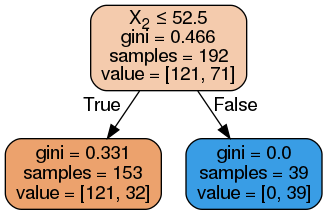

In [11]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()
export_graphviz(dtree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [12]:
y_pred = dtree.predict(df_features)
y_true = df_label

In [13]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_true, y_pred)

array([[121,   0],
       [ 32,  39]])

In [14]:
df[~y_pred]

id   latitude  longitude  accuracy (m)  time (min)  outlier  \
0      0  52.491817  13.346698             8           0    False   
1      1  52.488910  13.343119             4           2    False   
2      2  52.485900  13.339539            10           4    False   
6      6  52.475103  13.327095            12          12    False   
7      7  52.472092  13.323345            24          14    False   
8      8  52.468562  13.319425            30          16    False   
9      9  52.465966  13.315674            42          18    False   
10    10  52.463889  13.311413             8          20    False   
11    11  52.462331  13.306640            10          22    False   
12    12  52.461292  13.298458             4          24    False   
13    13  52.475290  13.289759             8          26     True   
14    14  52.460981  13.286867            12          28    False   
15    15  52.461084  13.280560            16          30    False   
16    16  52.461708  13.275446            20          32    False   
17    17  52.463162  13.272377            24          34    False   
18    18  52.465862  13.272036            30          36    False   
19    19  52.468043  13.274934            36          38    False   
20    20  52.469490  13.279622            40          40    False   
21    21  52.465672  13.288956            12          42     True   
22    22  52.471573  13.288912            42          44    False   
23    23  52.473442  13.293855            45          46    False   
24    24  52.475623  13.297435            30          48    False   
25    25  52.496963  13.328293            10          50     True   
26    26  52.481437  13.302719            12          52    False   
27    27  52.487839  13.385024            16          54     True   
28    28  52.487769  13.306981            12          56    False   
29    29  52.528150  13.336722             8          58     True   
30    30  52.490364  13.276245            10          60     True   
31    31  52.497317  13.313117             8          62    False   
33    33  52.502609  13.316186            10          66    False   
..   ...        ...        ...           ...         ...      ...   
155  155  52.482890  13.430053            30         310    False   
156  156  52.486938  13.428008            35         312    False   
157  157  52.489845  13.424599            30         314    False   
158  158  52.491920  13.419485            27         316    False   
159  159  52.492751  13.414030            28         318    False   
160  160  52.492433  13.409002            30         320    False   
161  161  52.491817  13.404314            20         322    False   
162  162  52.490571  13.402098            24         324    False   
163  163  52.487042  13.401587            18         326    False   
167  167  52.473546  13.403973            20         334    False   
169  169  52.509098  13.246943            24         338     True   
170  170  52.512356  13.245337            20         340     True   
172  172  52.460773  13.389143            10         344    False   
173  173  52.459520  13.384455            16         346    False   
174  174  52.411349  13.022026            10         348     True   
175  175  52.487594  13.368701            12         350     True   
176  176  52.459520  13.366727            18         352    False   
177  177  52.460253  13.361699            20         354    False   
178  178  52.462227  13.359483            12         356    False   
179  179  52.465031  13.362040             8         358    False   
180  180  52.466173  13.367153             4         360    False   
181  181  52.466900  13.371074             6         362    False   
182  182  52.468451  13.372523            10         364    False   
183  183  52.471573  13.372779            20         366    False   
184  184  52.508284  13.242661             8         368     True   
185  185  52.478108  13.369625            16         370    False   
186 

### Plot the filtered waypoints

In [15]:
df_filtered = df[~y_pred]
crs ={'init': 'epsg:4326'}

geometry_filtered = [Point(xy) for xy in zip(df_filtered['longitude'], df_filtered['latitude'])]

geo_df_filtered = gpd.GeoDataFrame(df_filtered, crs = crs, geometry = geometry_filtered)

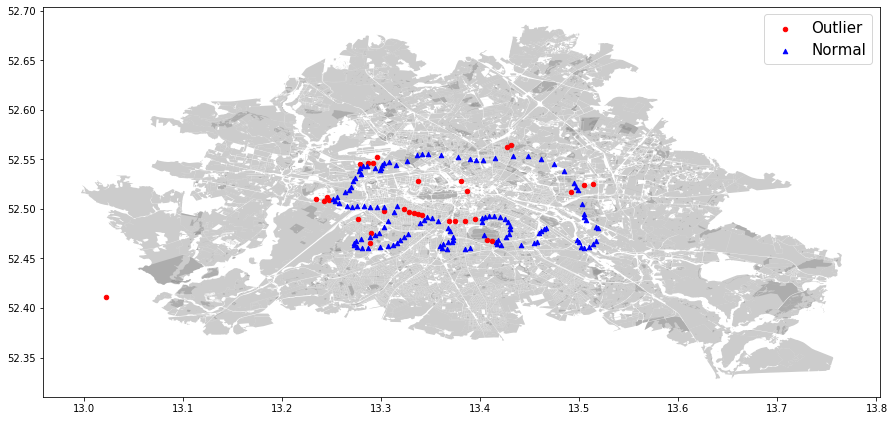

In [16]:
fig, ax = plt.subplots(figsize = (15, 15))
df_shp.plot(ax = ax, alpha = 0.4, color = 'grey')
geo_df_filtered[geo_df_filtered['outlier'] == True].plot(ax = ax, markersize = 20, color = 'red', marker = 'o', label = 'Outlier')
geo_df_filtered[geo_df_filtered['outlier'] == False].plot(ax = ax, markersize = 20, color = 'blue', marker = '^', label = 'Normal')
plt.legend(prop = {'size': 15})